#### 174119U - Perera W.A.S.S.J. <br>
Blog link: https://medium.com/@jayashakthiperera/apply-support-vector-machine-for-a-real-world-scenario-197e69cc82b6

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/banking.csv')
df.shape

(41188, 21)

## Understanding the Dataset

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In the source it is mentioned not to use 'duration' feature since
it  highly affects the output target.
It is dropped in order to achieve a realistic predictive model.

In [6]:
df = df.drop(labels='duration', axis=1)
df.shape

(41188, 20)

### Describe numerical and categorical columns

convert 'y' column values to categorical

In [7]:
df['y'] = np.where(df['y'] == 1, 'yes', 'no')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes


In [8]:
numerical_columns = list(df.select_dtypes(np.number).columns)
df.describe(include=np.number)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
categorical_columns = list(df.select_dtypes(exclude=np.number).columns)
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Check and handle missing values

#### null counts

In [10]:
df_temp = df.copy()
print(df.isnull().sum(axis=0))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


#### unknown counts

In [11]:
temp_df = pd.DataFrame(df, columns=categorical_columns)
temp_df[temp_df == 'unknown'].count() * 100/len(temp_df)

job             0.801204
marital         0.194231
education       4.202680
default        20.872584
housing         2.403613
loan            2.403613
contact         0.000000
month           0.000000
day_of_week     0.000000
poutcome        0.000000
y               0.000000
dtype: float64

#### count plots for categorical features

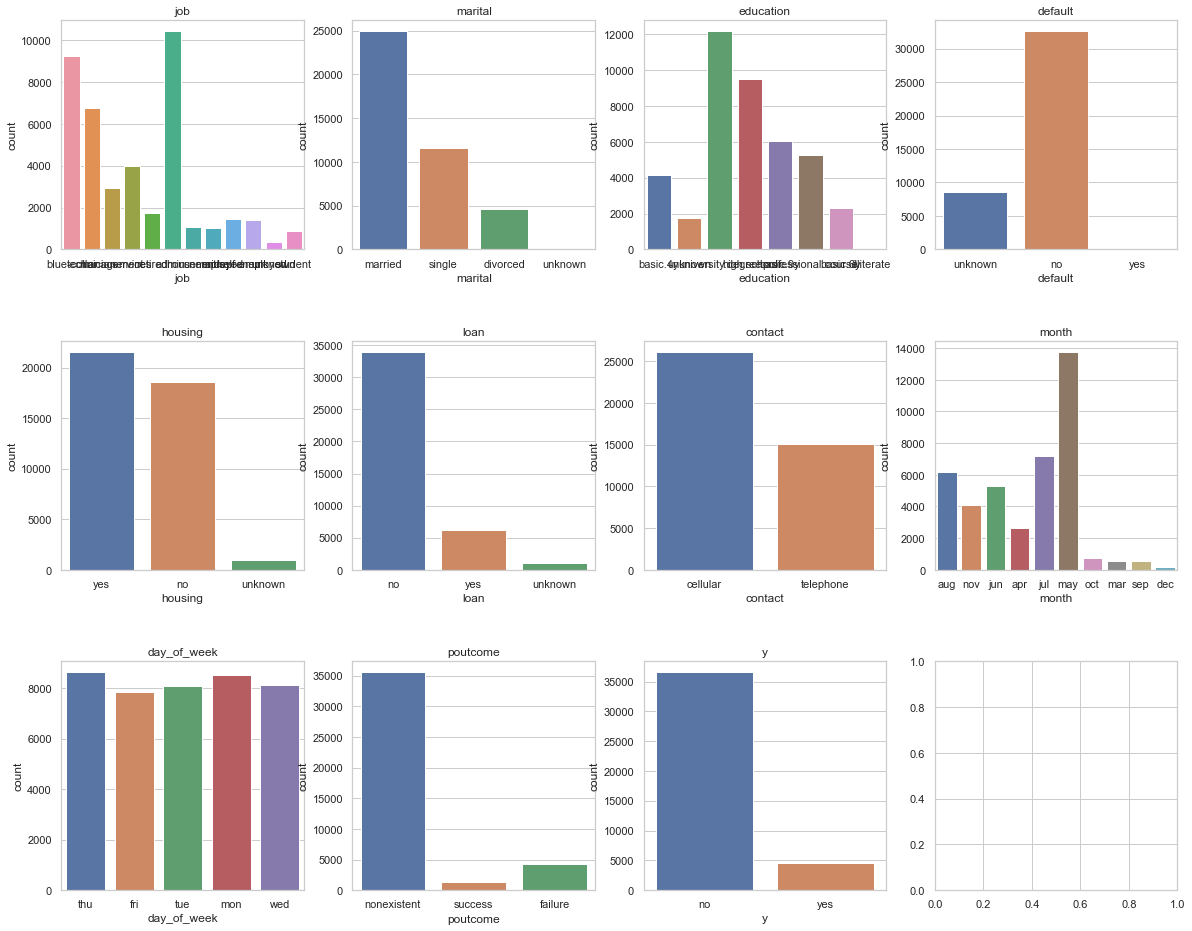

In [12]:
sns.set(rc={'figure.figsize':(20,16)}, style='whitegrid')

fig, axes = plt.subplots(3,4)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(temp_df.columns):
    sns.countplot(x=column, data=temp_df, ax=axes[int(i/4)][i%4])
    axes[int(i/4)][i%4].set_title(column)
plt.show()

##### 'y' - class attribute
We can see a huge class imbalance in the target variable. We'll deal with it later.

##### 'default' feature

In [13]:
df['default'].value_counts(normalize=True)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

There are three unique values in 'default' feature and 20.8% are unknown,
79% are no, only 0.007% are yes.

### Check and handle outliers

<AxesSubplot:>

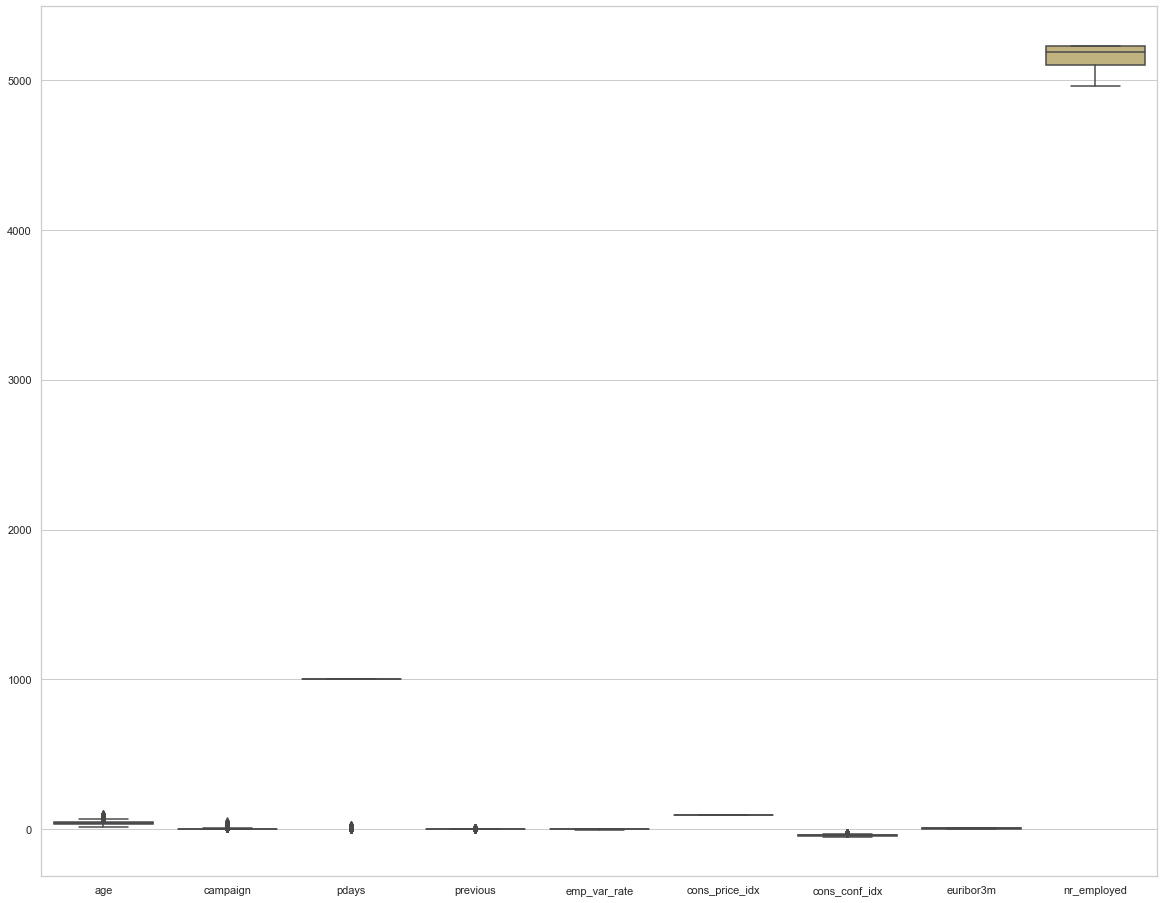

In [14]:
sns.boxplot(data=df)

Let's visualize 'campaign' and 'pdays' features individually.

In [15]:
sns.set(rc={'figure.figsize':(10,2)})

##### 'age' feature

<AxesSubplot:>

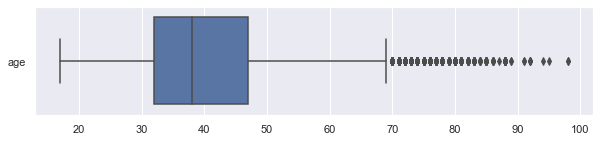

In [16]:
feature_name = 'age'
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

Between 0 - 100 valid range. Not contextual outliers

##### 'campaign' feature

<AxesSubplot:>

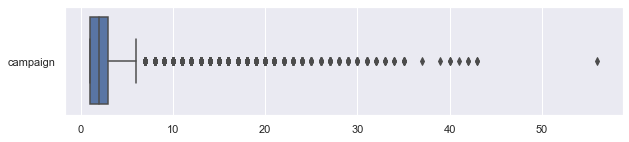

In [17]:
feature_name = 'campaign'
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

Remove campaign > 50

In [18]:
temp_df = df[df[feature_name] > 50]
temp_df[feature_name].value_counts()

56    1
Name: campaign, dtype: int64

<AxesSubplot:>

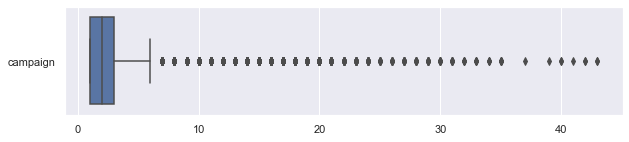

In [19]:
df = df[df[feature_name] < 50]
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

##### 'pdays' feature

<AxesSubplot:>

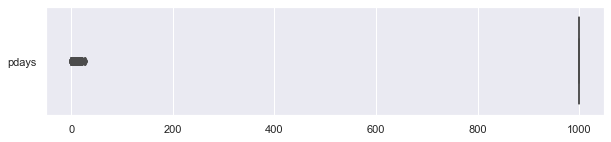

In [20]:
feature_name = 'pdays'
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

In [21]:
df[feature_name].value_counts(normalize=True)

999    0.963217
3      0.010659
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

'pdays' feature contains 96% values as 999.
999 means client was not previously contacted.
Therefore this feature doesn't provide considerable details.

In [22]:
df = df.drop(labels=feature_name, axis=1)
numerical_columns.remove('pdays')
df.shape

(41187, 19)

##### 'previous' feature

<AxesSubplot:>

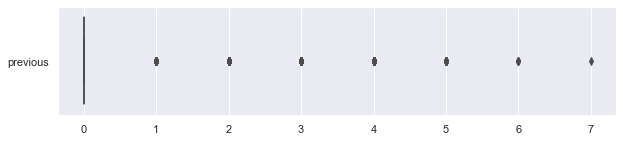

In [23]:
feature_name = 'previous'
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

Cannot be considered as outliers.

##### 'cons_conf_idx' feature

<AxesSubplot:>

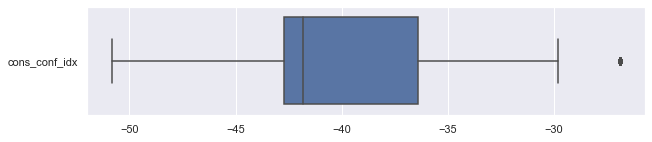

In [24]:
feature_name = 'cons_conf_idx'
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

In [25]:
temp_df = df[df[feature_name] > -30]
temp_df[feature_name].value_counts()

-26.9    447
-29.8    267
Name: cons_conf_idx, dtype: int64

-26.9 seems like an outlier. But there are 447 data points at -26.9. Therefore let's consider it
as an anomaly and leave it to be.

In [26]:
df.reset_index(inplace=True, drop=True)

### Q-Q Plots & Histograms

In [27]:
num_df = pd.DataFrame(df, columns=numerical_columns)
num_df.shape

(41187, 8)

#### Q-Q Plots

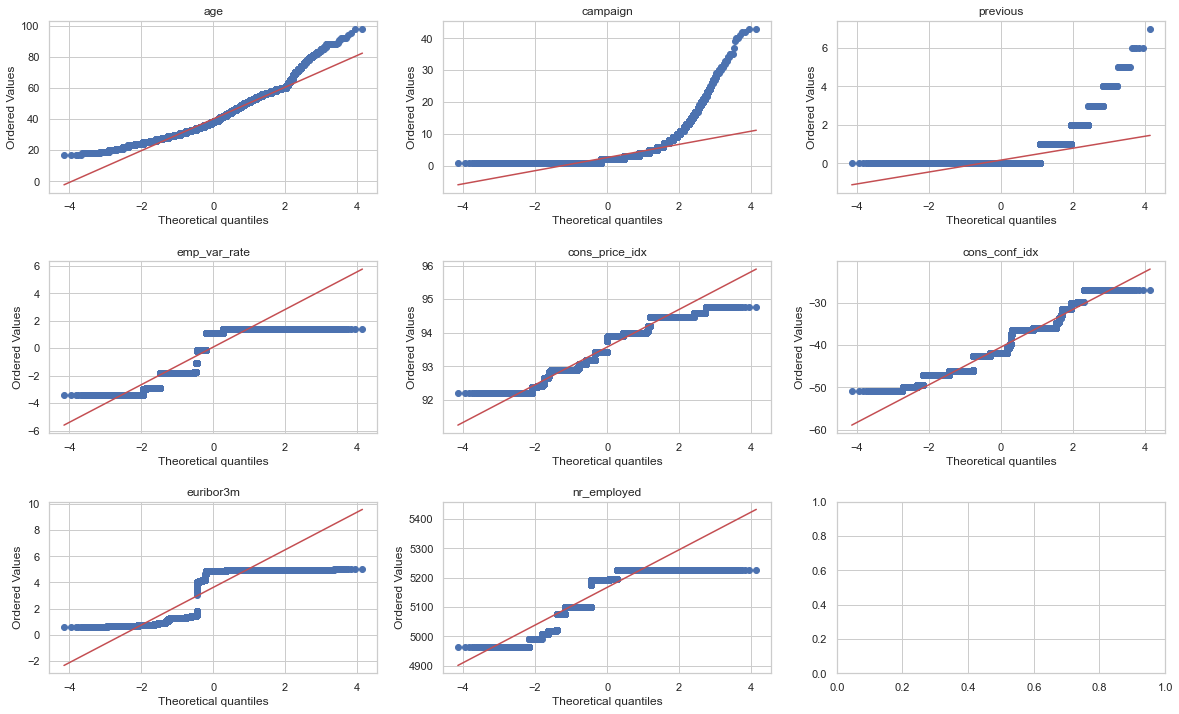

In [28]:
sns.set(rc={'figure.figsize':(20,12)}, style='whitegrid')
fig, axes = plt.subplots(3,3)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(num_df.columns):
    stats.probplot(num_df[column], dist="norm", plot=axes[int(i/3)][i%3])
    axes[int(i/3)][i%3].set_title(column)
plt.show()

#### Histograms

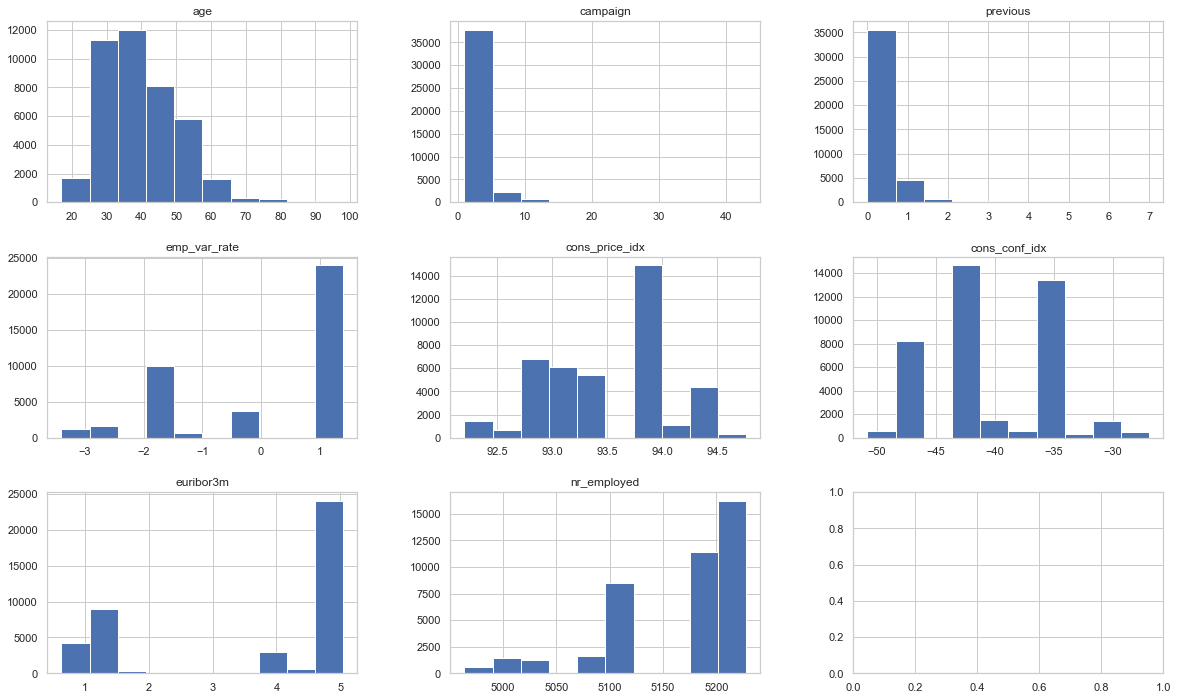

In [29]:
fig, axes = plt.subplots(3,3)
for i, column in enumerate(num_df.columns):
    temp_df = pd.DataFrame(num_df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

<li>'nr_employed' - left skewed
<li>'age' - right skewed
<li>'campaign' - right skewed
<li>'previous' - right skewed

### Apply transformations

#### nr_employed

array([<AxesSubplot:title={'center':'nr_employed'}>], dtype=object)

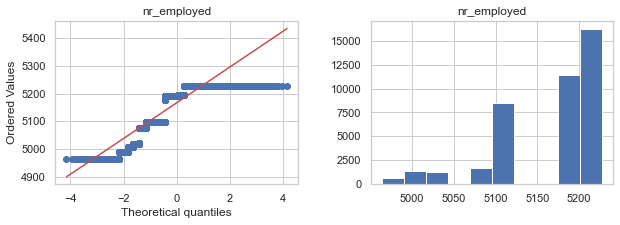

In [30]:
sns.set(rc={'figure.figsize':(10,3)}, style='whitegrid')
fig, axes = plt.subplots(1,2)
feature_name = 'nr_employed';
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

'nr_employed' is left skewed. Apply power transformation with power of 2.
(exponential transformation can not be applied since there are much bigger values.)

In [31]:
from sklearn.preprocessing import FunctionTransformer

power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(num_df[[feature_name]])
num_df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'nr_employed'}>], dtype=object)

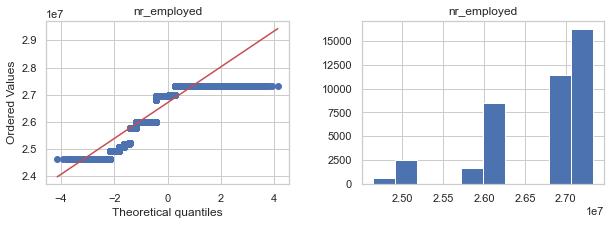

In [32]:
fig, axes = plt.subplots(1,2)
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

#### age

array([<AxesSubplot:title={'center':'age'}>], dtype=object)

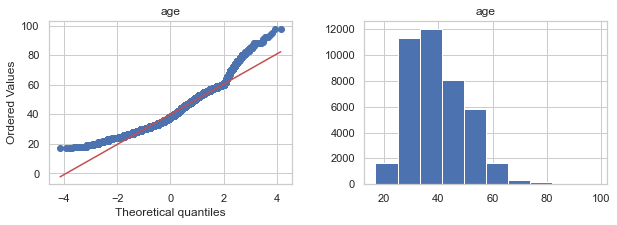

In [33]:
fig, axes = plt.subplots(1,2)
feature_name = 'age';
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

'age' is right skewed. Apply squre root transformation.
(Since we applied power transformation with power of 2 for left skewed, it's better
to apply squre root transformation.)

In [34]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(num_df[[feature_name]])
num_df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'age'}>], dtype=object)

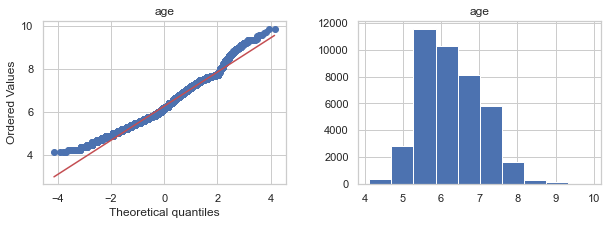

In [35]:
fig, axes = plt.subplots(1,2)
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

#### campaign

array([<AxesSubplot:title={'center':'campaign'}>], dtype=object)

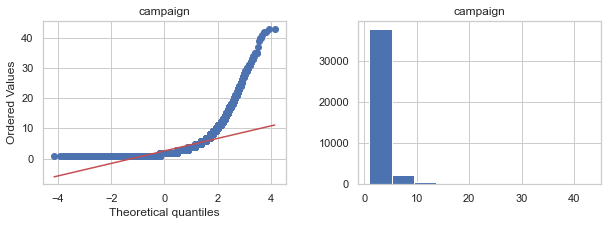

In [36]:
fig, axes = plt.subplots(1,2)
feature_name = 'campaign';
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

'campaign' is right skewed. Apply squre root transformation.

In [37]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(num_df[[feature_name]])
num_df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'campaign'}>], dtype=object)

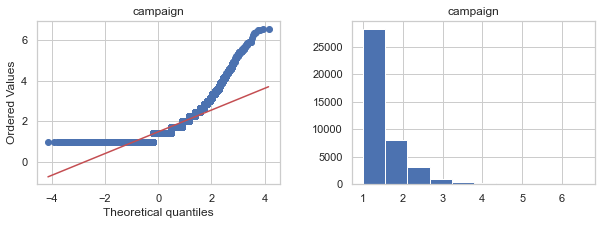

In [38]:
fig, axes = plt.subplots(1,2)
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

#### previous

array([<AxesSubplot:title={'center':'previous'}>], dtype=object)

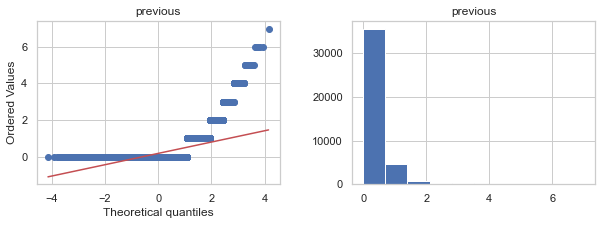

In [39]:
fig, axes = plt.subplots(1,2)
feature_name = 'previous';
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

'previous' is right skewed. Apply squre root transformation.

In [40]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(num_df[[feature_name]])
num_df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'previous'}>], dtype=object)

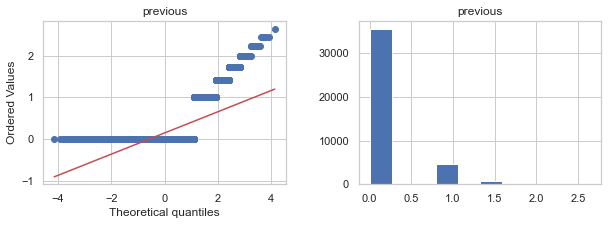

In [41]:
fig, axes = plt.subplots(1,2)
stats.probplot(num_df[feature_name], dist="norm", plot=axes[0])
axes[0].set_title(feature_name)

temp_df = pd.DataFrame(num_df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

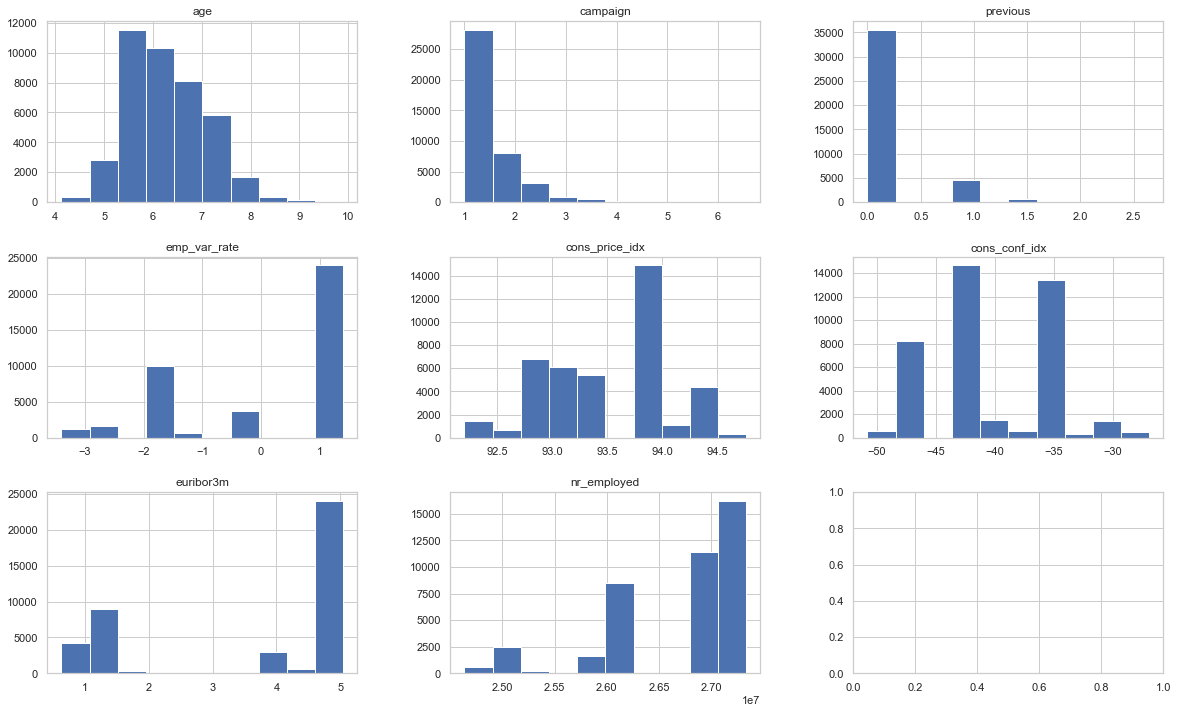

In [42]:
sns.set(rc={'figure.figsize':(20,12)}, style='whitegrid')
fig, axes = plt.subplots(3,3)
for i, column in enumerate(num_df.columns):
    temp_df = pd.DataFrame(num_df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

In [43]:
df = df.drop(labels=num_df.columns, axis=1)
df = df.join(num_df)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent,no,6.633250,1.000000,0.000000,1.4,93.444,-36.1,4.963,27333029.61
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent,no,7.280110,1.000000,0.000000,-0.1,93.200,-42.0,4.021,26996337.64
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success,yes,5.291503,1.732051,1.414214,-1.7,94.055,-39.8,0.729,24916070.56
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent,no,6.244998,1.414214,0.000000,-1.8,93.075,-47.1,1.405,26000820.81
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success,yes,7.416198,1.000000,1.000000,-2.9,92.201,-31.4,0.869,25767806.44


### Apply categorical data encoding

In [44]:
cat_df = pd.DataFrame(df, columns=categorical_columns)
cat_df.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41187,41187,41187,41187,41187,41187,41187,41187,41187,41187,41187
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10421,24927,12167,32588,21576,33950,26144,13768,8623,35562,36547


Label encoding

In [45]:
for col in cat_df.columns:
    cat_df[col] = cat_df[col].astype('category').cat.codes
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1,1,0,1,2,0,0,1,2,1,0
1,9,1,7,0,0,0,0,7,0,1,0
2,4,2,6,0,2,0,0,4,2,2,1
3,7,1,3,0,0,0,0,0,0,1,0
4,5,1,0,0,2,0,0,1,0,2,1


In [46]:
df = df.drop(labels=cat_df.columns, axis=1)
df = df.join(cat_df)
df.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,6.633250,1.000000,0.000000,1.4,93.444,-36.1,4.963,27333029.61,1,1,0,1,2,0,0,1,2,1,0
1,7.280110,1.000000,0.000000,-0.1,93.200,-42.0,4.021,26996337.64,9,1,7,0,0,0,0,7,0,1,0
2,5.291503,1.732051,1.414214,-1.7,94.055,-39.8,0.729,24916070.56,4,2,6,0,2,0,0,4,2,2,1
3,6.244998,1.414214,0.000000,-1.8,93.075,-47.1,1.405,26000820.81,7,1,3,0,0,0,0,0,0,1,0
4,7.416198,1.000000,1.000000,-2.9,92.201,-31.4,0.869,25767806.44,5,1,0,0,2,0,0,1,0,2,1


### Data Scaling/Standardization

In [47]:
num_df = pd.DataFrame(df, columns=numerical_columns)
num_df.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,6.633250,1.000000,0.000000,1.4,93.444,-36.1,4.963,27333029.61
1,7.280110,1.000000,0.000000,-0.1,93.200,-42.0,4.021,26996337.64
2,5.291503,1.732051,1.414214,-1.7,94.055,-39.8,0.729,24916070.56
3,6.244998,1.414214,0.000000,-1.8,93.075,-47.1,1.405,26000820.81
4,7.416198,1.000000,1.000000,-2.9,92.201,-31.4,0.869,25767806.44


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_df)
scaled = scaler.transform(num_df)
scaled_df = pd.DataFrame(scaled, columns=num_df.columns)
scaled_df.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.445054,-0.777848,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353
1,1.248818,-0.777848,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111
2,-1.222151,0.411124,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444
3,-0.037373,-0.105096,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973
4,1.417917,-0.777848,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340


In [49]:
df = df.drop(labels=numerical_columns, axis=1)
df = df.join(scaled_df)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1,1,0,1,2,0,0,1,2,1,0,0.445054,-0.777848,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353
1,9,1,7,0,0,0,0,7,0,1,0,1.248818,-0.777848,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111
2,4,2,6,0,2,0,0,4,2,2,1,-1.222151,0.411124,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444
3,7,1,3,0,0,0,0,0,0,1,0,-0.037373,-0.105096,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973
4,5,1,0,0,2,0,0,1,0,2,1,1.417917,-0.777848,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340


### Correlation Analysis
#### dependent and independent features

<AxesSubplot:>

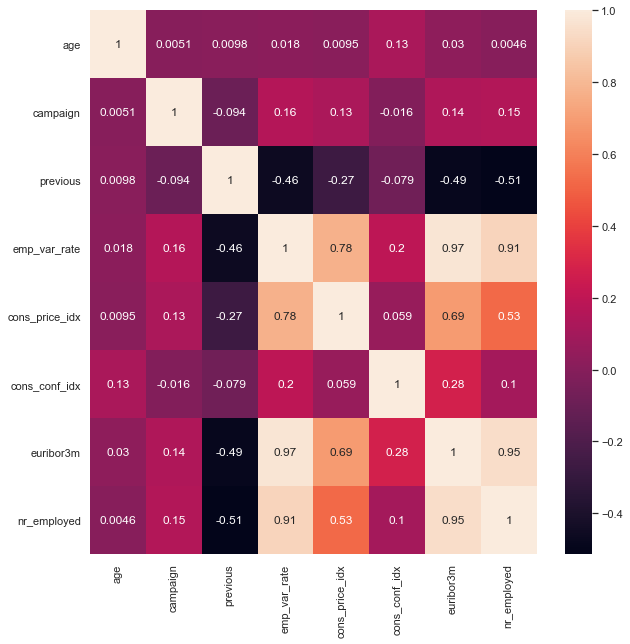

In [50]:
num_df = pd.DataFrame(df, columns=numerical_columns)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(num_df.corr(), annot=True)

Following features depend on each other
<li>emp_var_rate
<li>euribor3m
<li>nr_employed<br>
(shows 0.9+ correlation to each other)

#### signifncance of the continuous features

<AxesSubplot:>

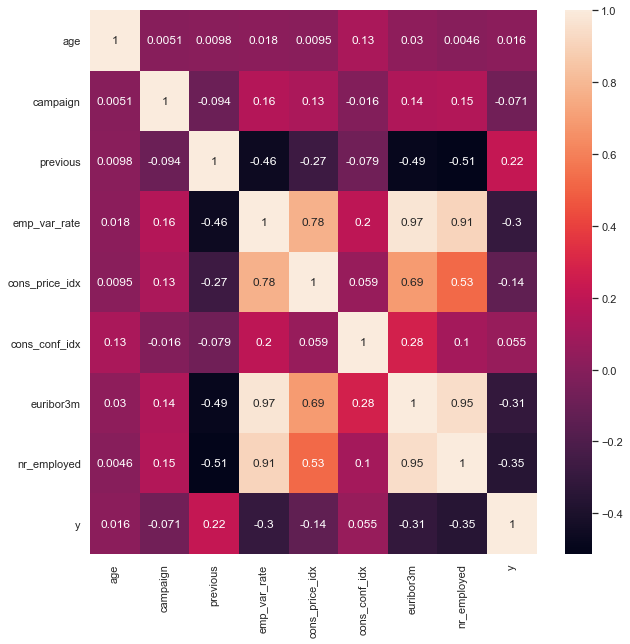

In [51]:
sns.heatmap(pd.concat([num_df, df['y']], axis=1).corr(), annot=True)

From above bucket 'nr_employed' has the highest negative correlation with y.<br>
Therefore we'll keep 'nr_employed' and drop other dependent features

In [52]:
df = df.drop(labels=['emp_var_rate', 'euribor3m'], axis=1)
df.shape

(41187, 17)

### Split for train and test

In [53]:
from sklearn.model_selection import train_test_split

df_x = df.drop('y', axis=1)
df_y = pd.DataFrame(df, columns=['y'])
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.2, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32949, 16)
(8238, 16)
(32949, 1)
(8238, 1)


### Perform PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([0.39280204, 0.16903383, 0.1321021 , 0.06018828, 0.05812629,
       0.035169  , 0.02930713, 0.02869031, 0.02571538, 0.02216861,
       0.01565224, 0.01210719, 0.00843736, 0.0044566 , 0.00351436,
       0.00252927])

In [57]:
pca.explained_variance_ratio_[:10].sum()

0.9533029735375849

10 components are considered to achieve 95% of variance.

In [60]:
pca = PCA(n_components=10)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

### Model Training

#### Check class imbalance

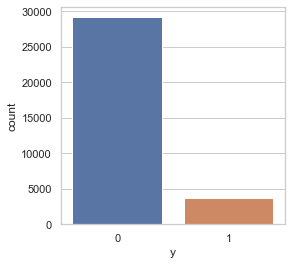

In [66]:
sns.set(rc={'figure.figsize':(4,4)}, style='whitegrid')

sns.countplot(x='y', data=y_train)
plt.show()

In [67]:
y_train['y'].value_counts(normalize=True)

0    0.885672
1    0.114328
Name: y, dtype: float64

A huge class imbalance can be seen here. Approximately 89% - 11%.
When the class imbalance is around 90% - 10% it's an anomaly detection.
It's not suitable to perform SMOTE techniques in this scenario.

In [61]:
from sklearn.svm import SVC
from sklearn import metrics

#### SVM linear

In [62]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(pca_x_train, np.ravel(y_train))
y_pred = svclassifier.predict(pca_x_test)

title = 'Confusion matrix (kernel=linear)'
print(title)
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print('--------------------------------------')
print('--------------------------------------')

Confusion matrix (kernel=linear)
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7365
           1       0.00      0.00      0.00       873

    accuracy                           0.89      8238
   macro avg       0.45      0.50      0.47      8238
weighted avg       0.80      0.89      0.84      8238

Accuracy: 0.894027676620539
Precision: 0.0
Recall: 0.0
--------------------------------------
--------------------------------------


c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\s

Linear SVM only predicts the major class. Let's try with the 'rbf' kernel.

#### SVM rbf
##### C=1, various gamma values
Here we are trying to find an optimal gamma value.

In [64]:
gamma_values = [0.01, 0.1, 0.5, 1, 10]
for gamma in gamma_values:
    svclassifier = SVC(kernel='rbf', C=1, gamma=gamma)
    svclassifier.fit(pca_x_train, np.ravel(y_train))
    y_pred = svclassifier.predict(pca_x_test)

    title = 'Confusion matrix (kernel=rbf) C=1, gamma='  + str(gamma)
    print(title)
    print(metrics.classification_report(y_test, y_pred))

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print('--------------------------------------')
    print('--------------------------------------')

Confusion matrix (kernel=rbf) C=1, gamma=0.01
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7365
           1       0.53      0.05      0.08       873

    accuracy                           0.89      8238
   macro avg       0.72      0.52      0.51      8238
weighted avg       0.86      0.89      0.85      8238

Accuracy: 0.894634620053411
Precision: 0.5333333333333333
Recall: 0.045819014891179836
--------------------------------------
--------------------------------------
Confusion matrix (kernel=rbf) C=1, gamma=0.1
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7365
           1       0.50      0.16      0.24       873

    accuracy                           0.89      8238
   macro avg       0.70      0.57      0.59      8238
weighted avg       0.86      0.89      0.87      8238

Accuracy: 0.894027676620539
Precision: 0.5
Recall: 0.16036655211912945
-------------------

#### SVM rbf
##### gamma=0.1, various C values
Here we are trying to find an optimal C value.

In [65]:
c_values = [0.01, 0.1, 1, 10, 50, 100]
for c_val in c_values:
    svclassifier = SVC(kernel='rbf', C=c_val, gamma=0.1)
    svclassifier.fit(pca_x_train, np.ravel(y_train))
    y_pred = svclassifier.predict(pca_x_test)

    title = 'Confusion matrix (kernel=rbf) C=' + str(c_val) + ', gamma=0.1'
    print(title)
    print(metrics.classification_report(y_test, y_pred))

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print('--------------------------------------')
    print('--------------------------------------')

Confusion matrix (kernel=rbf) C=0.01, gamma=0.1
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7365
           1       0.00      0.00      0.00       873

    accuracy                           0.89      8238
   macro avg       0.45      0.50      0.47      8238
weighted avg       0.80      0.89      0.84      8238

Accuracy: 0.894027676620539
Precision: 0.0
Recall: 0.0
--------------------------------------
--------------------------------------
Confusion matrix (kernel=rbf) C=0.1, gamma=0.1
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7365
           1       0.40      0.00      0.01       873

    accuracy                           0.89      8238
   macro avg       0.65      0.50      0.48      8238
weighted avg       0.84      0.89      0.84      8238

Accuracy: 0.8937848992473901
Precision: 0.4
Recall: 0.004581901489117984
--------------------------------------
------

c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shakthi\documents\ml_workspace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\s

It seems like C=100 and gamma 0.1 are the optimal in our case.
Let's finalize our model with these parameter values.

Confusion matrix (kernel=rbf) C=100, gamma=0.1
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7365
           1       0.44      0.29      0.35       873

    accuracy                           0.89      8238
   macro avg       0.68      0.62      0.64      8238
weighted avg       0.87      0.89      0.88      8238

Accuracy: 0.8852876911871813
Precision: 0.43856655290102387
Recall: 0.2943871706758305


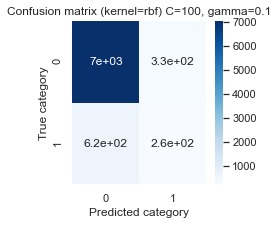

In [70]:
svclassifier = SVC(kernel='rbf', C=100, gamma=0.1)
svclassifier.fit(pca_x_train, np.ravel(y_train))
y_pred = svclassifier.predict(pca_x_test)

title = 'Confusion matrix (kernel=rbf) C=100, gamma=0.1'
print(title)
print(metrics.classification_report(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(3,3)})
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True, cmap='Blues')
plt.title(title)
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

<li> precision - 44%
<li> recall - 29%
<li> F-measure - 35%<br>
These are the measures we were able to reach.